In [1]:
import numpy as np
from scipy import signal
import signal_processing as sp
import matplotlib.pyplot as plt
import functools

![alt text](example1.png)

In [2]:
X0 = 1
Tges = 200000
Ts = 250e-3
Nbatch=1
x = sp.random_process(
    power=X0,
    Tges=Tges,
    Ts=Ts,
    Nbatch=Nbatch
)

y = sp.apply_batch(x, functools.partial(sp.moving_average, Ts=Ts, Taverage=2))
z = sp.apply_batch(x, functools.partial(sp.delay, Ts=Ts, Td=2))


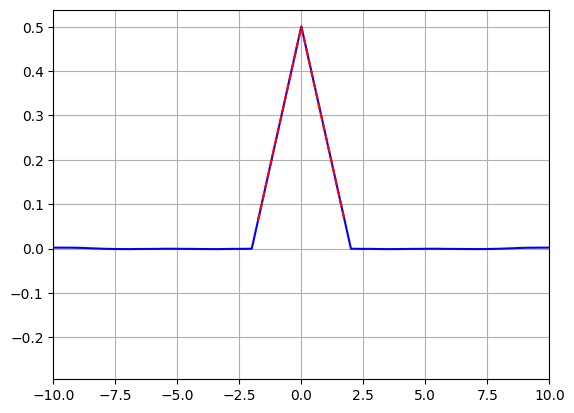

In [11]:
phi_yy, tau = sp.acf_batch(y, Ts)
plt.plot(tau, phi_yy, 'b', label='')
plt.grid(True)
plt.xlim((-10, 10))



phi_hh, tau = sp.filter_acf(np.ones(int(2/Ts))/(2/Ts)/Ts, Ts)
plt.plot(tau, phi_hh*Ts, 'r--', label='')

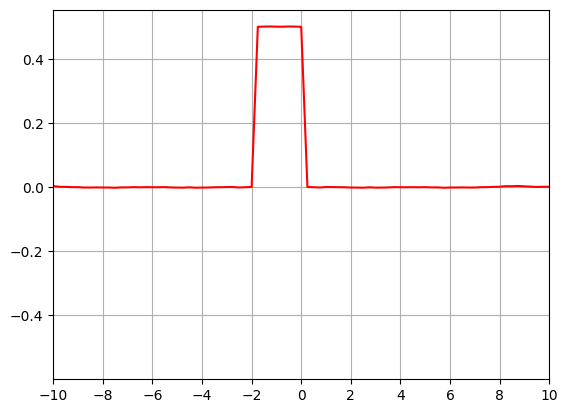

In [17]:
phi_xy, tau = sp.ccf_batch(x, y, Ts)
plt.plot(tau, phi_xy, 'r')
plt.xlim((-10, 10))
plt.xticks(range(-10, 12, 2))
plt.grid(True)


(-10.0, 10.0)

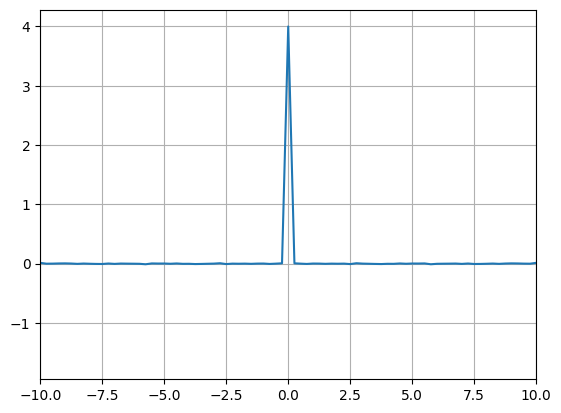

In [18]:
phi_zz, tau = sp.acf_batch(z, Ts)
plt.plot(tau, phi_zz)
plt.grid(True)
plt.xlim((-10, 10))